In [125]:
import numpy as np
import matplotlib.pyplot as plt
import math


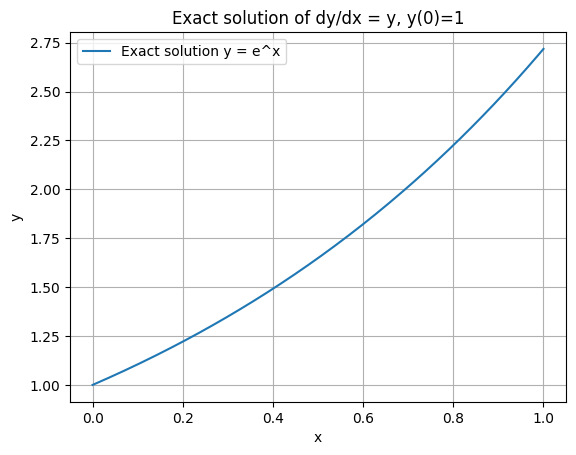

In [126]:
# ODE: dy/dx = y,  y(0) = 1,  x in [0, 1]
# exact solution: y(x) = e^x

def y_exact(x):
    return np.exp(x)

# plot the exact solution on [0, 1]
x_fine = np.linspace(0.0, 1.0, 200)
y_fine = y_exact(x_fine)

plt.figure()
plt.plot(x_fine, y_fine, label="Exact solution y = e^x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Exact solution of dy/dx = y, y(0)=1")
plt.grid(True)
plt.legend()
plt.show()


In [127]:
def forward_euler(h):
    """
    Solve dy/dx = y, y(0)=1 on [0,1] using forward Euler with step size h.
    Returns arrays x, y_num corresponding to the grid points.
    """
    N = int(1.0 / h)          # number of steps
    x = np.linspace(0.0, 1.0, N + 1)  # grid: x_n = n*h
    y = np.zeros(N + 1)
    y[0] = 1.0                # initial condition

    for n in range(N):
        y[n+1] = y[n] + h * y[n]   # dy/dx = y  ->  y_{n+1} = y_n + h*y_n

    return x, y


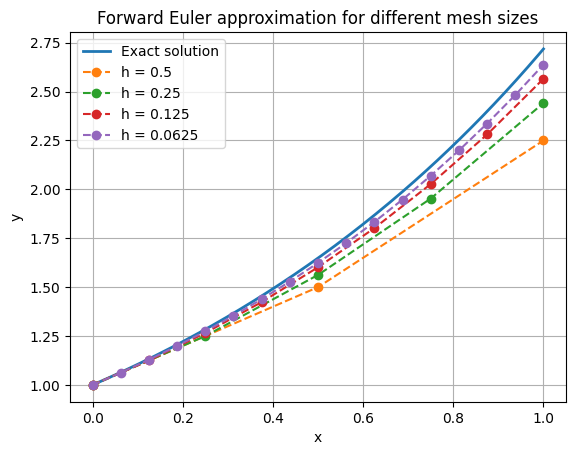

In [128]:
h_values = [1/2, 1/4, 1/8, 1/16]
solutions = {}   # store (x, y_num) for each h

plt.figure()
plt.plot(x_fine, y_fine, label="Exact solution", linewidth=2)

for h in h_values:
    x_h, y_h = forward_euler(h)
    solutions[h] = (x_h, y_h)
    plt.plot(x_h, y_h, marker='o', linestyle='--', label=f"h = {h}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Forward Euler approximation for different mesh sizes")
plt.grid(True)
plt.legend()
plt.show()


Numerical solution y(0.5) for different mesh sizes:
         h           y(0.5)
------------------------------
  0.500000     1.5000000000
  0.250000     1.5625000000
  0.125000     1.6018066406
  0.062500     1.6241700950

Exact y(0.5) = e^0.5 = 1.6487212707


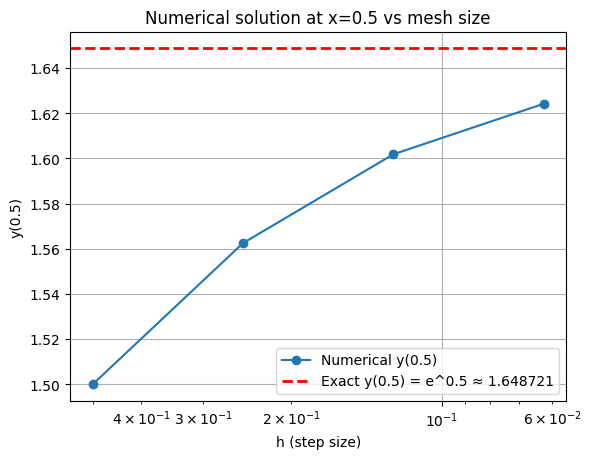

In [129]:
# Plot numerical solution values at x=0.5 for each mesh size
y_at_05 = []
for h in h_values:
    x_h, y_h = solutions[h]
    idx_05 = np.argmin(np.abs(x_h - 0.5))
    y_at_05.append(y_h[idx_05])

h_array_temp = np.array(h_values)
y_at_05 = np.array(y_at_05)
exact_at_05 = math.e**0.5

# Print the array of y(0.5) values for different h
print("Numerical solution y(0.5) for different mesh sizes:")
print(f"{'h':>10}  {'y(0.5)':>15}")
print("-" * 30)
for h, y_val in zip(h_values, y_at_05):
    print(f"{h:10.6f}  {y_val:15.10f}")
print(f"\nExact y(0.5) = e^0.5 = {exact_at_05:.10f}")

plt.figure()
plt.semilogx(h_array_temp, y_at_05, marker='o', linestyle='-', label='Numerical y(0.5)')
plt.axhline(y=exact_at_05, color='r', linestyle='--', linewidth=2, label=f'Exact y(0.5) = e^0.5 ≈ {exact_at_05:.6f}')
plt.xlabel('h (step size)')
plt.ylabel('y(0.5)')
plt.title('Numerical solution at x=0.5 vs mesh size')
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()
plt.show()


In [130]:
local_errors = []
global_errors = []

for h in h_values:
    x_h, y_h = solutions[h]
    y_exact_h = y_exact(x_h)

    # local error (L2) at x = 0.5
    # since all chosen h divide 0.5 exactly, 0.5 is on the grid
    idx_05 = np.argmin(np.abs(x_h - 0.5))  # index closest to 0.5
    e_local = abs(y_h[idx_05] - math.e**0.5)   # |y_num(0.5) - e^0.5|

    # global L2 error over all grid points:
    # sqrt( sum (y_num - y_exact)^2 )
    e_global = np.sqrt(np.sum((y_h - y_exact_h)**2))

    local_errors.append(e_local)
    global_errors.append(e_global)


In [131]:
# Calculate local truncation error at each time step
# Local truncation error = true value at next point - calculated value using exact solution at current point

local_truncation_errors_all = {}

for h in h_values:
    x_h, y_h = solutions[h]
    N = len(x_h)
    
    lte_array = np.zeros(N-1)  # local truncation error for each step
    
    # Calculate LTE for each time step
    for i in range(N-1):
        # Current point
        x_current = x_h[i]
        y_exact_current = y_exact(x_current)
        
        # Next point
        x_next = x_h[i+1]
        y_exact_next = y_exact(x_next)
        
        # Calculate one step using forward Euler with exact value at current point
        y_calculated_next = y_exact_current + h * y_exact_current
        
        # Local truncation error at next point
        lte_array[i] = y_exact_next - y_calculated_next
    
    local_truncation_errors_all[h] = (x_h[1:], lte_array)

# Collect LTE at x=0.5 and x=1.0 for ratio calculation
lte_at_05_list = []
lte_at_10_list = []

for h in h_values:
    x_points, lte_values = local_truncation_errors_all[h]
    
    # LTE at x=0.5
    idx_05 = np.argmin(np.abs(x_points - 0.5))
    lte_at_05_list.append(lte_values[idx_05])
    
    # LTE at x=1.0 (last point)
    idx_10 = np.argmin(np.abs(x_points - 1.0))
    lte_at_10_list.append(lte_values[idx_10])

# Print results in table format with ratio
print("Local truncation error at x=0.5, next point, and x=1.0:")
print(f"{'h':>10}  {'x=0.5':>12}  {'LTE@0.5':>15}  {'Ratio':>10}  {'x next':>12}  {'LTE next':>15}  {'x=1.0':>12}  {'LTE@1.0':>15}  {'Ratio':>10}")
print("-" * 135)

for i, h in enumerate(h_values):
    x_points, lte_values = local_truncation_errors_all[h]
    
    # Find index closest to x=0.5
    idx_05 = np.argmin(np.abs(x_points - 0.5))
    x_05 = x_points[idx_05]
    lte_05 = lte_values[idx_05]
    
    # Calculate ratio for LTE at 0.5
    if i > 0:
        ratio_05 = lte_at_05_list[i-1] / lte_at_05_list[i]
        ratio_05_str = f"{ratio_05:10.6f}"
    else:
        ratio_05_str = "N/A"
    
    # Find index closest to x=1.0
    idx_10 = np.argmin(np.abs(x_points - 1.0))
    x_10 = x_points[idx_10]
    lte_10 = lte_values[idx_10]
    
    # Calculate ratio for LTE at 1.0
    if i > 0:
        ratio_10 = lte_at_10_list[i-1] / lte_at_10_list[i]
        ratio_10_str = f"{ratio_10:10.6f}"
    else:
        ratio_10_str = "N/A"
    
    # Next point after 0.5
    if idx_05 + 1 < len(x_points):
        x_next = x_points[idx_05 + 1]
        lte_next = lte_values[idx_05 + 1]
        print(f"{h:10.6f}  {x_05:12.6f}  {lte_05:15.8e}  {ratio_05_str:>10}  {x_next:12.6f}  {lte_next:15.8e}  {x_10:12.6f}  {lte_10:15.8e}  {ratio_10_str:>10}")
    else:
        print(f"{h:10.6f}  {x_05:12.6f}  {lte_05:15.8e}  {ratio_05_str:>10}  {'N/A':>12}  {'N/A':>15}  {x_10:12.6f}  {lte_10:15.8e}  {ratio_10_str:>10}")


Local truncation error at x=0.5, next point, and x=1.0:
         h         x=0.5          LTE@0.5       Ratio        x next         LTE next         x=1.0          LTE@1.0       Ratio
---------------------------------------------------------------------------------------------------------------------------------------
  0.500000      0.500000   1.48721271e-01         N/A      1.000000   2.45199922e-01      1.000000   2.45199922e-01         N/A
  0.250000      0.500000   4.36894998e-02    3.404051      0.750000   5.60984282e-02      1.000000   7.20318077e-02    3.404051
  0.125000      0.500000   1.18559293e-02    3.685034      0.625000   1.34345279e-02      1.000000   1.95471227e-02    3.685034
  0.062500      0.500000   3.08907840e-03    3.838015      0.562500   3.28830684e-03      1.000000   5.09302927e-03    3.838015


In [132]:
print("Mesh convergence results (Forward Euler for dy/dx = y, y(0)=1)")
print(f"{'h':>8}  {'Global error @ x=0.5':>20}  {'Error ratio':>12}  {'Global L2':>15}")
print("-" * 70)

for i, (h, e_loc, e_glob) in enumerate(zip(h_values, local_errors, global_errors)):
    # Calculate ratio with previous h
    if i > 0:
        ratio = local_errors[i-1] / local_errors[i]
        ratio_str = f"{ratio:12.6f}"
    else:
        ratio_str = "N/A"
    
    print(f"{h:8.4f}  {e_loc:20.8e}  {ratio_str:>12}  {e_glob:15.8e}")


Mesh convergence results (Forward Euler for dy/dx = y, y(0)=1)
       h  Global error @ x=0.5   Error ratio        Global L2
----------------------------------------------------------------------
  0.5000        1.48721271e-01           N/A   4.91330731e-01
  0.2500        8.62212707e-02      1.724879   3.34823750e-01
  0.1250        4.69146301e-02      1.837833   2.30719093e-01
  0.0625        2.45511757e-02      1.910891   1.60681336e-01


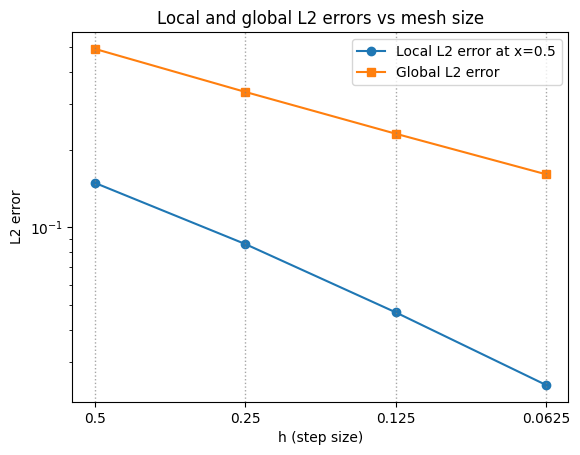

In [133]:
h_array = np.array(h_values)
local_errors = np.array(local_errors)
global_errors = np.array(global_errors)

plt.figure()
plt.loglog(h_array, local_errors, marker='o', linestyle='-', label="Local L2 error at x=0.5")
plt.loglog(h_array, global_errors, marker='s', linestyle='-', label="Global L2 error")

# Add vertical dotted lines at each h value
for h in h_array:
    plt.axvline(x=h, color='gray', linestyle=':', linewidth=1, alpha=0.7)

plt.xlabel("h (step size)")
plt.ylabel("L2 error")
plt.title("Local and global L2 errors vs mesh size")

# Set custom x-axis ticks at the h values only
ax = plt.gca()
ax.set_xticks(h_array)
ax.set_xticklabels(['0.5', '0.25', '0.125', '0.0625'])
ax.xaxis.set_minor_locator(plt.NullLocator())  # Remove minor ticks
ax.invert_xaxis()

plt.legend()
plt.show()


In [134]:
def estimate_rate(errors, h_vals):
    rates = []
    for i in range(len(h_vals) - 1):
        h1, h2 = h_vals[i], h_vals[i+1]
        e1, e2 = errors[i], errors[i+1]
        p = np.log(e1 / e2) / np.log(h1 / h2)
        rates.append(p)
    return rates

local_rates = estimate_rate(local_errors, h_array)
global_rates = estimate_rate(global_errors, h_array)

print("\nEstimated convergence rates (between successive h values):")
print("Between h_i -> h_{i+1} (local L2):", local_rates)
print("Between h_i -> h_{i+1} (global L2):", global_rates)



Estimated convergence rates (between successive h values):
Between h_i -> h_{i+1} (local L2): [np.float64(0.786495272316704), np.float64(0.8780059350327561), np.float64(0.9342457737331192)]
Between h_i -> h_{i+1} (global L2): [np.float64(0.5532926116956061), np.float64(0.5372644695164243), np.float64(0.5219350374518853)]
